In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

graduation = pd.read_csv('Texas_Graduation_Data.csv')

In [2]:
display(graduation.head())
print(graduation.shape)

,COUNTY,CNTYNAME,CNTY_ALLD,CNTY_ALLN_CMP2,CNTY_ALLN_GRAD,CNTY_ALLN_CONT,CNTY_ALLN_TXCHSE,CNTY_ALLN_DROP,CNTY_ALLR_CMP2,CNTY_ALLR_GRAD,...,CNTY_TTLN_GRAD,CNTY_TTLN_CONT,CNTY_TTLN_TXCHSE,CNTY_TTLN_DROP,CNTY_TTLR_CMP2,CNTY_TTLR_GRAD,CNTY_TTLR_CONT,CNTY_TTLR_TXCHSE,CNTY_TTLR_DROP,CNTY_TTLR_RAED
0,1,ANDERSON COUNTY,559,556,542,12,2,3,99.5,97.0,...,441,6,1,1,99.8,98.2,1.3,0.2,0.2,95.9
1,2,ANDREWS COUNTY,290,281,274,7,0,9,96.9,94.5,...,254,0,0,4,98.4,98.4,0.0,0.0,1.6,95.3
2,3,ANGELINA COUNTY,"1,225","1,154","1,141",11,2,71,94.2,93.1,...,606,4,2,14,97.8,96.8,0.6,0.3,2.2,88.4
3,4,ARANSAS COUNTY,249,243,237,3,3,6,97.6,95.2,...,237,3,3,6,97.6,95.2,1.2,1.2,2.4,78.9
4,5,ARCHER COUNTY,159,159,159,0,0,0,100.0,100.0,...,0,0,0,0,.,.,.,.,.,.


(252, 398)


In [3]:
graduation = graduation[['COUNTY','CNTYNAME','CNTY_ALLD','CNTY_ALLR_GRAD','CNTY_ALLR_DROP','CNTY_MALD', 'CNTY_MALR_GRAD', 'CNTY_FEMD', 'CNTY_FEMR_GRAD']]
graduation.head()

,COUNTY,CNTYNAME,CNTY_ALLD,CNTY_ALLR_GRAD,CNTY_ALLR_DROP,CNTY_MALD,CNTY_MALR_GRAD,CNTY_FEMD,CNTY_FEMR_GRAD
0,1,ANDERSON COUNTY,559,97.0,0.5,289,96.9,270,97.0
1,2,ANDREWS COUNTY,290,94.5,3.1,151,92.7,139,96.4
2,3,ANGELINA COUNTY,"1,225",93.1,5.8,615,91.5,610,94.8
3,4,ARANSAS COUNTY,249,95.2,2.4,132,95.5,117,94.9
4,5,ARCHER COUNTY,159,100.0,0.0,89,100.0,70,100.0


In [4]:
graduation=graduation.copy()
graduation.rename(columns= {'COUNTY' : 'County',
                         'CNTYNAME' : 'County Name',
                         'CNTY_ALLD' : 'Students',
                         'CNTY_ALLR_GRAD' : 'Grad',
                         'CNTY_ALLR_DROP' : 'Drop',
                         'CNTY_MALD' : 'Males',
                         'CNTY_MALR_GRAD' : 'Males Grad',
                         'CNTY_FEMD' : 'Females',
                         'CNTY_FEMR_GRAD' : 'Females Grad'},
               inplace = True)
graduation.head()

,County,County Name,Students,Grad,Drop,Males,Males Grad,Females,Females Grad
0,1,ANDERSON COUNTY,559,97.0,0.5,289,96.9,270,97.0
1,2,ANDREWS COUNTY,290,94.5,3.1,151,92.7,139,96.4
2,3,ANGELINA COUNTY,"1,225",93.1,5.8,615,91.5,610,94.8
3,4,ARANSAS COUNTY,249,95.2,2.4,132,95.5,117,94.9
4,5,ARCHER COUNTY,159,100.0,0.0,89,100.0,70,100.0


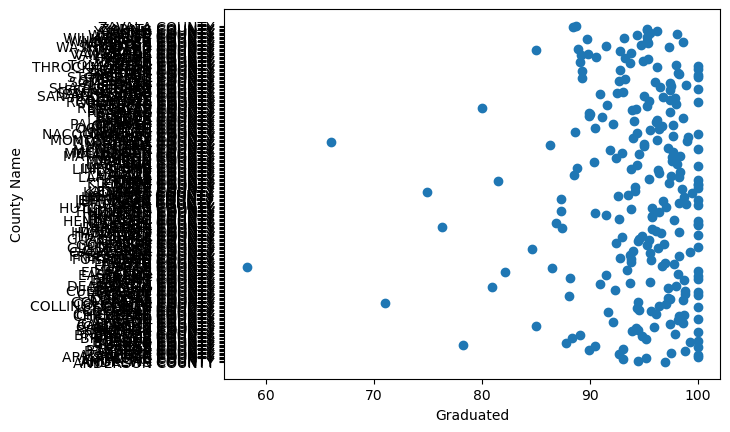

In [5]:
plt.scatter(graduation['Grad'], graduation['County Name'])
plt.xlabel('Graduated')
plt.ylabel('County Name')
plt.show()

In [6]:
column_name = 'Students'
graduation['Students'] = graduation['Students'].str.replace(',','').astype(int)

if column_name in graduation.columns:
    graduation.drop(graduation[graduation[column_name] < 5000].index,
                    inplace = True)

graduation['Students']

13      5610
14     24951
19      5310
30      7525
42     17310
56     37572
60     10377
70     13945
78      9472
83      6158
100    64749
107    16390
167     8671
217    26471
224    12485
243     9535
Name: Students, dtype: int64